In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pickle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

print("Setup Complete")

Setup Complete


In [2]:
#Explore Data
player_file_path='Data/nba_players_stats_salary_2017_2018.csv'
player_data=pd.read_csv(player_file_path)
player_data.describe()

,AGE,GP,MIN,W,L,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,AST,TOV,STL,BLK,SALARY
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,3.870000e+02
mean,26.832041,53.984496,20.376744,28.059432,25.925065,8.854264,3.306202,7.225840,0.862274,2.408269,1.381395,1.802584,0.829457,2.848837,1.984496,1.182946,0.662532,0.420155,6.947932e+06
std,4.333292,25.011392,9.321274,16.094252,14.025036,6.127040,2.208676,4.656224,0.807749,2.088157,1.334328,1.636372,0.763453,1.922344,1.820997,0.829644,0.449141,0.412822,7.620060e+06
min,19.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.224800e+04
25%,24.000000,35.000000,13.900000,15.000000,15.500000,4.300000,1.650000,3.700000,0.100000,0.600000,0.500000,0.700000,0.300000,1.600000,0.700000,0.600000,0.300000,0.150000,1.471382e+06
50%,26.000000,62.000000,20.200000,27.000000,27.000000,7.600000,2.800000,6.300000,0.700000,2.100000,1.000000,1.300000,0.600000,2.500000,1.400000,1.000000,0.600000,0.300000,3.381480e+06
75%,29.500000,74.000000,27.750000,42.000000,35.000000,12.600000,4.850000,10.250000,1.400000,3.700000,1.800000,2.400000,1.100000,3.850000,2.800000,1.600000,0.900000,0.600000,1.049866e+07
max,41.000000,82.000000,36.900000,62.000000,60.000000,30.400000,10.500000,21.100000,4.200000,10.000000,8.700000,10.100000,5.100000,10.900000,10.300000,5.000000,2.400000,2.600000,3.468255e+07


In [3]:
# Choose target and features
y = player_data.SALARY
player_features = ['FTM','AGE', 'GP','STL', 'FTA', 'W','3PM','FGA','DREB','FGM','MIN', 'TOV','AST','3PA','PTS','OREB','BLK','L' ]
X = player_data[player_features]

In [4]:
#Cross validation
my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=75,
                                                              random_state=0))
                             ])

In [5]:
#fit estimator
my_pipeline.fit(X,y)
#Serialize estimator
with open('my_pipeline.pkl','wb') as fid:
    pickle.dump(my_pipeline,fid)

In [6]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=10,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)
print("Average MAE score (across experiments):")
print(scores.mean())

MAE scores:
 [3531358.06871795 2942502.3982906  3593470.40512821 3941557.75931624
 3419271.87555556 3844226.50153846 4153635.82290598 3045196.25578947
 3138116.48701754 3552377.15614035]
Average MAE score (across experiments):
3516171.273040036


In [7]:
val_predict =cross_val_predict(my_pipeline, X, y,cv=5)
print("Values predicted:\n",val_predict)

Values predicted:
 [ 3186921.2         6622787.61333333  1554436.78666667 14706472.52
  3768878.21333333 10175682.61333333  2920527.17333333  1666454.4
  1342818.57333333  1491881.93333333  8152461.12       14515843.61333333
  8122416.2         8982012.09333333  7402404.81333333  2734417.46666667
  6639029.          2678024.24       20248867.45333333   835807.98666667
  9049631.70666667  2375824.74666667  8592823.05333333  9883660.24
  3095757.94666667  1344835.8         9705433.72        4321110.62666667
 22800700.44        4704547.93333333  3198075.77333333  4115256.62666667
  3030937.28       11106509.64       15508791.89333333  7082053.33333333
  6287454.72        3419136.48        2189014.02666667   544333.90666667
  9530911.77333333   530776.05333333  2244030.21333333  3807333.81333333
  2001150.22666667  3714311.62666667 14372755.8         1748825.36
  6484599.28        2667375.77333333  1887150.08        2173085.10666667
  1469660.17333333 22118216.98666667  9410737.14666667  2

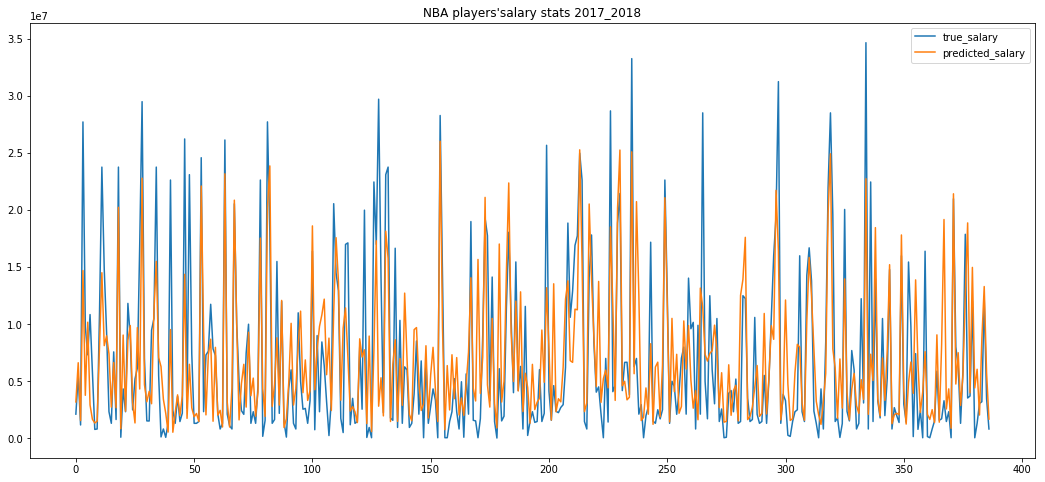

In [8]:
#data frame 
true_salary=player_data.SALARY
plot_data2=pd.DataFrame(data = {'true_salary':true_salary,'predicted_salary':val_predict})

# Set the width and height of the figure
plt.figure(figsize=(18,8))

# Add title
plt.title("NBA players'salary stats 2017_2018")

# Line chart showing true salary'
sns.lineplot(data=plot_data2['true_salary'], label="true_salary")

# Line chart showing predicted salary'
sns.lineplot(data=plot_data2['predicted_salary'], label="predicted_salary")

In [9]:
#Cross validation one row to predict
num=50
Xnew=[X.iloc[num]]
ynew=my_pipeline.predict(Xnew)

print("True salary: ",true_salary.iloc[num],"\nPredicted salary ",ynew)


True salary:  1312611.0 
Predicted salary  [1592857.64]


In [10]:
#To deserialize estimator later
with open('my_pipeline.pkl','wb') as fid:
    pickle.dump(my_pipeline,fid)